In [1]:
import pandas as pd
import numpy as np
import csv  
import matplotlib.pyplot as plt  
import seaborn as sns
from datetime import datetime

In [2]:
df_lichess = pd.read_csv('games.csv')

In [3]:
df_lichess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df_lichess.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [5]:
df_lichess['rated'].describe()

count     20058
unique        2
top        True
freq      16155
Name: rated, dtype: object

In [6]:
df_lichess['white_rating'].describe()

count    20058.000000
mean      1596.631868
std        291.253376
min        784.000000
25%       1398.000000
50%       1567.000000
75%       1793.000000
max       2700.000000
Name: white_rating, dtype: float64

In [7]:
vc = df_lichess[['black_id', 'white_id']].apply(pd.Series.value_counts)
vc = vc.fillna(0)
vc["black_id"] = vc["white_id"] + vc["black_id"]
vc = vc.drop("white_id", 1)
vc = vc.rename(columns={'black_id': 'id_count'})
vc = vc.sort_values(by='id_count', ascending=False)
vc

<ipython-input-7-fa54f910e2a4>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vc = vc.drop("white_id", 1)


,id_count
taranga,154.0
a_p_t_e_m_u_u,96.0
vladimir-kramnik-1,96.0
king5891,78.0
saviter,76.0
...,...
hildesheimer,1.0
hilton65,1.0
hincesti007,1.0
hindenburg9192,1.0


In [8]:
vc['id_count'].describe()

count    15635.000000
mean         2.565782
std          6.024316
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        154.000000
Name: id_count, dtype: float64

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


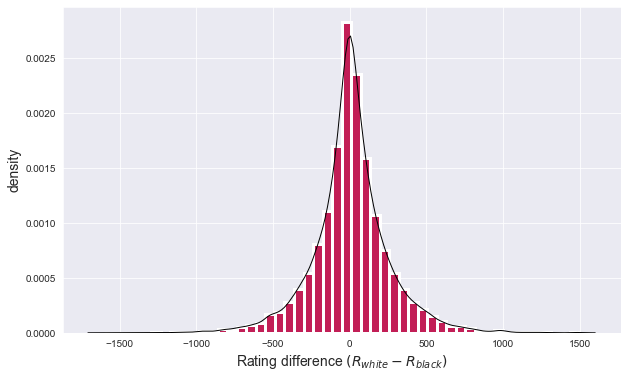

In [11]:
fig = plt.figure(figsize=(10,6))
p = sns.distplot((df_lichess['white_rating']-df_lichess['black_rating']), color='#C21E56',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#C21E56'}
                )
sns.set_style("darkgrid")
p.set_xlabel("Rating difference $(R_{white} - R_{black})$", fontsize = 14)
p.set_ylabel("density", fontsize = 14)
plt.show()

In [12]:
(df_lichess['white_rating']-df_lichess['black_rating']).describe()

count    20058.000000
mean         7.799880
std        249.036667
min      -1605.000000
25%       -108.000000
50%          3.000000
75%        122.000000
max       1499.000000
dtype: float64

In [13]:
#df_rated = df_lichess.drop((df_lichess['rated']==False).index)
df_rated = df_lichess.drop(df_lichess[df_lichess['rated']==True].index)

#(df_rated['white_rating']-df_rated['black_rating']).describe()
df_rated['black_rating'].describe()

count    3903.000000
mean     1569.497310
std       296.051494
min       795.000000
25%      1396.000000
50%      1500.000000
75%      1751.000000
max      2723.000000
Name: black_rating, dtype: float64

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


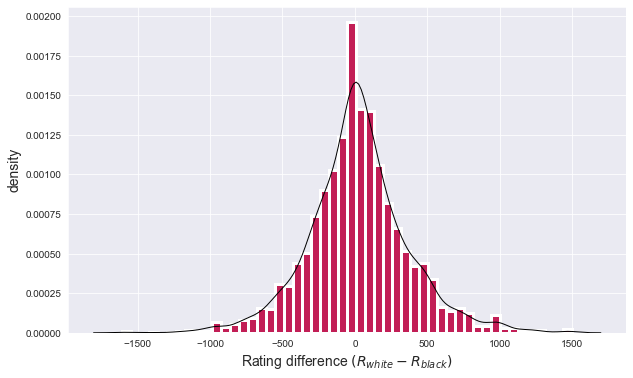

In [14]:
fig = plt.figure(figsize=(10,6))
p = sns.distplot((df_rated['white_rating']-df_rated['black_rating']), color='#C21E56',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#C21E56'}
                )
sns.set_style("darkgrid")
p.set_xlabel("Rating difference $(R_{white} - R_{black})$", fontsize = 14)
p.set_ylabel("density", fontsize = 14)
plt.show()

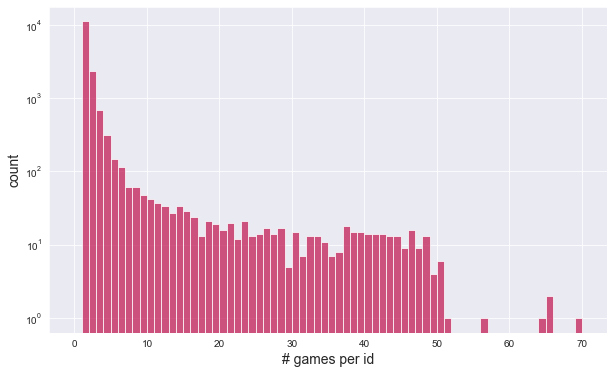

In [15]:
fig = plt.figure(figsize=(10,6))
p = sns.histplot(vc,
                 palette=['#C21E56'], 
                 binwidth = 1,
                 binrange = [0,70],
                 log_scale=(False,True),
                 legend = False
                )
sns.set_style("darkgrid")
p.set_xlabel("# games per id", fontsize = 14)
p.set_ylabel("count", fontsize = 14)
plt.show()

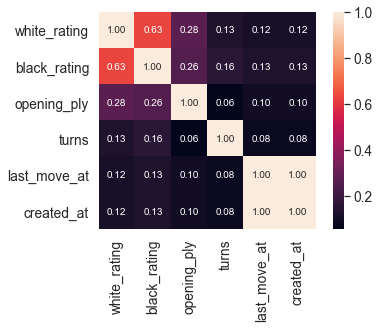

In [18]:
k = 6 
corrmat = df_lichess.corr()
cols = corrmat.nlargest(k, 'white_rating')['white_rating'].index
cm = np.corrcoef(df_lichess[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


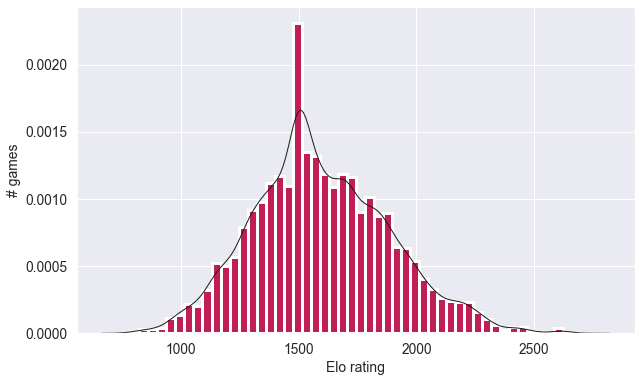

In [19]:
fig = plt.figure(figsize=(10,6))
p = sns.distplot(df_lichess['white_rating'], color='#C21E56',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#C21E56'}
                )
sns.set_style("darkgrid")
p.set_xlabel("Elo rating", fontsize = 14)
p.set_ylabel("# games", fontsize = 14)
plt.show()

In [20]:
df_lichess_c1 = df_lichess.drop(df_lichess[df_lichess['white_rating']<1793.000000].index)
df_lichess_c2 = df_lichess.drop(df_lichess[df_lichess['white_rating']>1398.000000].index)

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


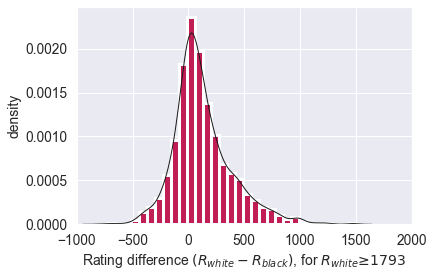

In [21]:
fig = plt.figure(figsize=(6,4))
p = sns.distplot((df_lichess_c1['white_rating']-df_lichess_c1['black_rating']), color='#C21E56',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#C21E56'},
                bins=32,
                )
sns.set_style("darkgrid")
plt.xlim(-1000, 2000)
p.set_xlabel("Rating difference $(R_{white} - R_{black})$, for $R_{white} ≥ 1793$", fontsize = 14)
p.set_ylabel("density", fontsize = 14)
plt.show()

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


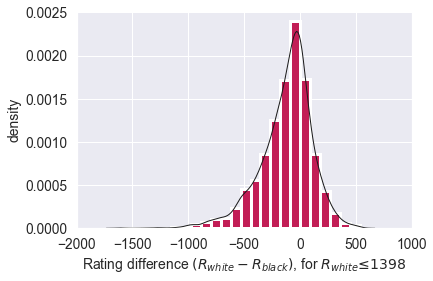

In [22]:
fig = plt.figure(figsize=(6,4))
p = sns.distplot((df_lichess_c2['white_rating']-df_lichess_c2['black_rating']), color='#C21E56',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#C21E56'},
                bins=24,
                )
sns.set_style("darkgrid")
plt.xlim(-2000, 1000)
p.set_xlabel("Rating difference $(R_{white} - R_{black})$, for $R_{white} ≤ 1398$", fontsize = 14)
p.set_ylabel("density", fontsize = 14)
plt.show()